In [56]:
from sklearn.datasets import load_iris

In [57]:
iris = load_iris()

In [58]:
x = iris.data
y = iris.target

In [59]:
x.shape, y.shape

((150, 4), (150,))

In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
y = to_categorical(y, 3)

In [62]:
y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(32, input_shape=(4,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [66]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [67]:
history = model.fit(x,y,epochs=10, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/10
4/4 [==============================] - 1s 90ms/step - loss: 1.4487 - accuracy: 0.4167 - val_loss: 1.3201 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 1.2905 - accuracy: 0.4167 - val_loss: 1.3456 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 15ms/step - loss: 1.1694 - accuracy: 0.4167 - val_loss: 1.4074 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 1.0646 - accuracy: 0.4167 - val_loss: 1.4456 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 0.9956 - accuracy: 0.4667 - val_loss: 1.4719 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 18ms/step - loss: 0.9461 - accuracy: 0.6917 - val_loss: 1.5115 - val_accuracy: 0.0000e+00
Epoch 6: early stopping


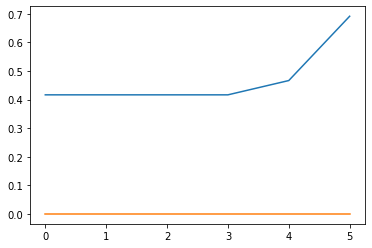

In [68]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# MNIST

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [87]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [88]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [89]:
train_x = train_x.reshape([train_x.shape[0], -1])
test_x = test_x.reshape([test_x.shape[0], -1])

In [90]:
train_x.shape

(60000, 784)

In [91]:
max_n, min_n = train_x.max(), train_x.min()

In [92]:
train_x = (train_x-min_n)/(max_n-min_n)
test_x = (test_x-min_n)/(max_n-min_n)

In [99]:
import numpy as np
len_y = len(set(train_y))

In [94]:
from tensorflow.keras.utils import to_categorical

In [103]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [104]:
train_y.shape

(60000, 10)

In [105]:
test_y.shape

(10000, 10)

In [106]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [107]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [108]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [109]:
from tensorflow.keras.callbacks import EarlyStopping

In [110]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [111]:
history = model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
                    verbose=1, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3915 - accuracy: 0.8887 - val_loss: 0.2237 - val_accuracy: 0.9357
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2005 - accuracy: 0.9416 - val_loss: 0.1821 - val_accuracy: 0.9473
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1600 - accuracy: 0.9527 - val_loss: 0.1624 - val_accuracy: 0.9521
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1353 - accuracy: 0.9600 - val_loss: 0.1529 - val_accuracy: 0.9539
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1174 - accuracy: 0.9646 - val_loss: 0.1434 - val_accuracy: 0.9584
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1036 - accuracy: 0.9692 - val_loss: 0.1444 - val_accuracy: 0.9589
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0923 - accuracy: 0.9718 - val_loss: 0.1351 - val_accuracy:

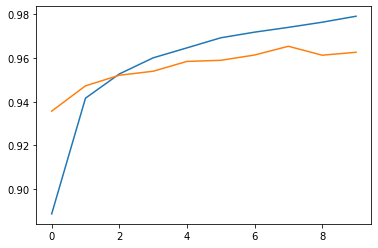

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [133]:
pred_test = model.predict(test_x)
single_pred_test = pred_test.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(test_y.argmax(axis=1), single_pred_train)

313/313 [==============================] - 1s 3ms/step


0.9611

In [114]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.1276 - accuracy: 0.9611


[0.12763261795043945, 0.9610999822616577]

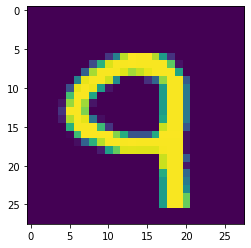

In [121]:
import random as rd
id = rd.randrange(0,10000)
plt.imshow(train_x[id].reshape(28,28))
plt.show()

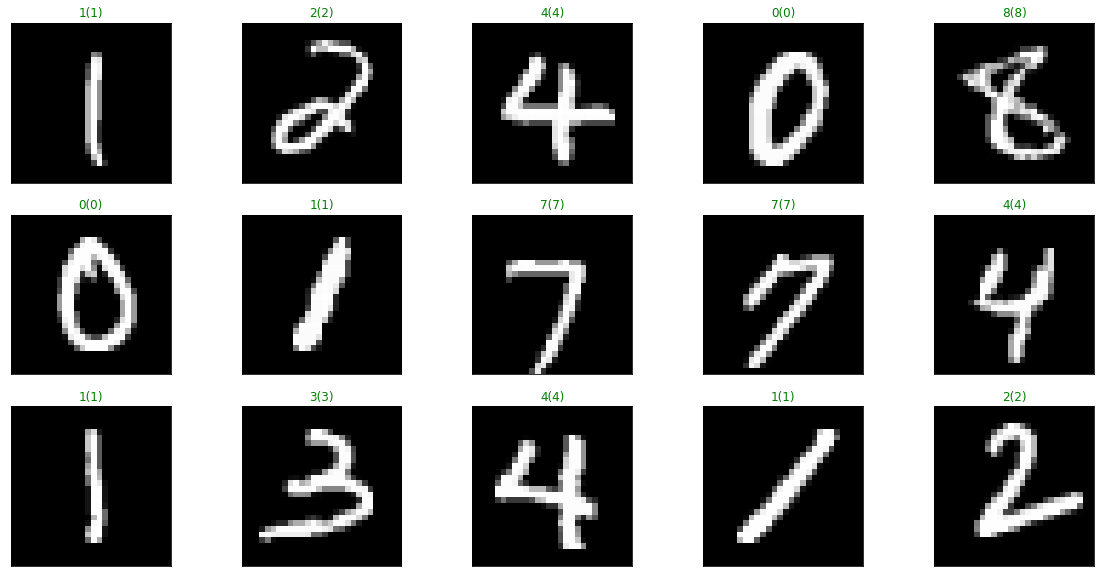

In [130]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
figure = plt.figure(figsize=(20,10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=True)):
  ax = figure.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(test_x[index].reshape([28,-1]), cmap='gray')  
  predict_index = pred_test[index].argmax(axis=0)
  true_index = test_y[index].argmax(axis=0)
  ax.set_title(f'{mnist_labels[predict_index]}({mnist_labels[true_index]})',
               color=('g' if predict_index==true_index else 'r'))

2
8
[ 0.  0.  4.  0.  0.  0.  0.  0. 94.  0.]


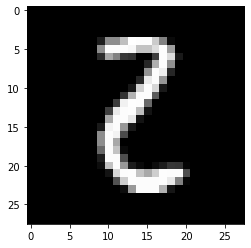

In [147]:
true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n =  len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(test_y.argmax(axis=1)[id])
print(single_pred_test[id])
print(np.floor(pred_test[id]*100))
plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()